#  Finding The Tortuosity ($\tau$) Of An Image Using ``tortuosity_fd``

In this tutorial, we will walk through how to use tortuosity_fd to calculate the tortuosity of an image using a finite difference method. The function takes a binary image to analyze with "True" to indicate the phase of interest as well as the axis along which to find the tortuosity.

### Algorithm Description

1. ``tortuosity_fd`` begins by calculating the porosity of the image passed. It does so by taking the sum of the image and dividing  it by the size of the image. 

$$ \varepsilon_{Original} = \frac{\sum_{i=0}^{n_{1}}\sum_{j=0}^{n_{2}} im_{ij}}{n_{1}\cdot n_{2}} $$
<br><br>

2. The inlets and outlets are then defined, and the image is trimmed using ``trim_nonpercolating_paths`` before re-evaluating the porosity using the formula above. 

$$ \varepsilon_{Eff} = \frac{\sum_{i=0}^{n_{1}}\sum_{j=0}^{n_{2}} im_{ij}}{n_{1}\cdot n_{2}} $$
<br><br>

3. A cubic network is generated using openpnm ``op.network.CubicTemplate()`` to be used as an orthogonal grid.
<br><br>

4. A dummy phase is created with the throat diffusive conductance assigned a value of 1 also using openpnm. ``op.phases.CubicTemplate()``
<br><br>
5. The fickian diffusion algorithm is applied to the network with the inlet concentration assigned a value of 1 and the outlet concentration being assigned 0.
<br><br>
6. The effective diffusion coefficient is then calculated from the formula: <br><br>
$$ D_{Eff} = \frac{\dot{\vec{N}} \cdot (L-1)}{A \cdot \Delta C} $$
<br><br>
**Here L-1 is used because the boundary conditions are put inside of the domain.**
<br><br>
7. The tortuosity is finally calculated using: <br><br>
$$\tau = \frac{D_{AB}}{D_{Eff}} \cdot \varepsilon_{Eff} $$
 <br><br>
8. The formation factor is calculated by: 
$$\mathscr{F}=\frac{1}{D_{Eff}}$$
 <br><br>
9. The useful results are then compiled into a results object. 

 ### Importing Packages

In [3]:
import matplotlib.pyplot as plt
import porespy as ps

### Generating the image:

For the purposes of this tutorial we will generate a 1000 x 1000 pixel image with a target porosity of 0.5.


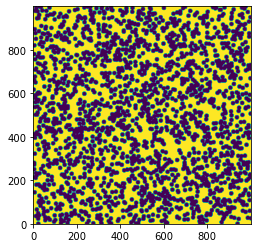

In [4]:
im = ps.generators.overlapping_spheres([1000,1000], r=10, porosity=0.5)
fig, ax = plt.subplots()
ax.imshow(im, origin='lower');

### Running the algorithm

As mentioned at the start of the tutorial the only two inputs for the function are the the image and the axis along which to run the calculation. For the x axis we assign axis a value of 1 and for the y axis we assign axis a value of 0. 

In [14]:
results = ps.simulations.tortuosity_fd(im=im, axis=1)
print(results)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――  
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
tortuosity                3.6413144906715567
formation_factor          7.3411970514193365
original_porosity         0.499806
effective_porosity        0.496011
concentration             Image of size (1000, 1000)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


The function outputs an object with several attributes: 

|Attribute||Description|
|:---------||:----|
|``tortuosity``||The **calculated tortuosity** is given by the equation:<br> <br>$$\tau = \frac{D_{AB}}{D_{Eff}} \cdot \varepsilon $$<br><br> where $\varepsilon$ is the ``effective_porosity``|
|``effective_porosity``||The effective porosity of the image after removing disconnected voxels |
|``original_porosity``||The porosity of the image as inputted|
|``formation_factor``||The formation factor is given by the equation: <br><br>$$\mathscr{F}=\frac{D_{AB}}{D_{Eff}}$$|
|``concentration``|| Returns an image containing the concentration values from the simulation|



### Calling Values From The Output

There are a couple ways to call the values from the returned object. The easiest way to call the values is to use object.attribute

7.3411970514193365

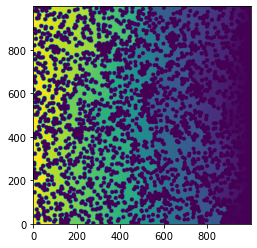

In [16]:
fig, ax=plt.subplots()
ax.imshow(results.concentration,origin ='lower');
results.formation_factor